In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [19]:
df = pd.read_csv("/kaggle/input/populatedcities/World City Populations 2023.csv")
df.head()

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank,Unnamed: 7
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1,NaN
1,32941308,32065760,Delhi,India,Asia,0.0273,2,NaN
2,29210808,28516904,Shanghai,China,Asia,0.0243,3,NaN
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4,NaN
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5,NaN


In [20]:
df.shape

(778, 8)

In [21]:
df.describe()

,Pop2023,Pop2022,growthRate,rank,Unnamed: 7
count,7.780000e+02,7.780000e+02,778.000000,778.000000,12.000000
mean,2.658927e+06,2.607826e+06,0.020758,389.500000,518.416667
std,3.700349e+06,3.638665e+06,0.013135,224.733546,153.840211
min,7.500970e+05,7.231140e+05,-0.034800,1.000000,227.000000
25%,9.921812e+05,9.657890e+05,0.012625,195.250000,386.500000
50%,1.381252e+06,1.362342e+06,0.019950,389.500000,603.000000
75%,2.607130e+06,2.548158e+06,0.028675,583.750000,639.750000
max,3.719410e+07,3.727400e+07,0.061100,778.000000,676.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pop2023     778 non-null    int64  
 1   Pop2022     778 non-null    int64  
 2   City        778 non-null    object 
 3   Country     778 non-null    object 
 4   Continent   778 non-null    object 
 5   growthRate  778 non-null    float64
 6   rank        778 non-null    int64  
 7   Unnamed: 7  12 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 48.8+ KB


In [23]:
df.columns

Index(['Pop2023', 'Pop2022', 'City', 'Country', 'Continent', 'growthRate',
       'rank', 'Unnamed: 7'],
      dtype='object')

In [24]:
df = df.drop(['Unnamed: 7'], axis=1)

In [25]:
df.head()

,Pop2023,Pop2022,City,Country,Continent,growthRate,rank
0,37194104,37274000,Tokyo,Japan,Asia,-0.0021,1
1,32941308,32065760,Delhi,India,Asia,0.0273,2
2,29210808,28516904,Shanghai,China,Asia,0.0243,3
3,23209616,22478116,Dhaka,Bangladesh,Asia,0.0325,4
4,22619736,22429800,Sao Paulo,Brazil,South America,0.0085,5


In [26]:
df.isna().sum()

Pop2023       0
Pop2022       0
City          0
Country       0
Continent     0
growthRate    0
rank          0
dtype: int64

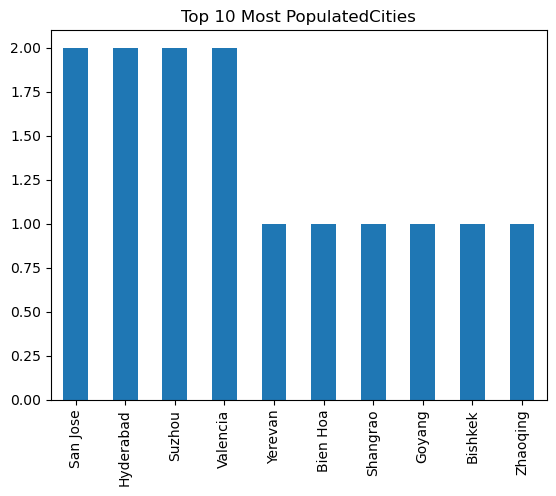

In [27]:
city = df['City'].value_counts().head(10).plot(kind='bar', title='Top 10 Most PopulatedCities')

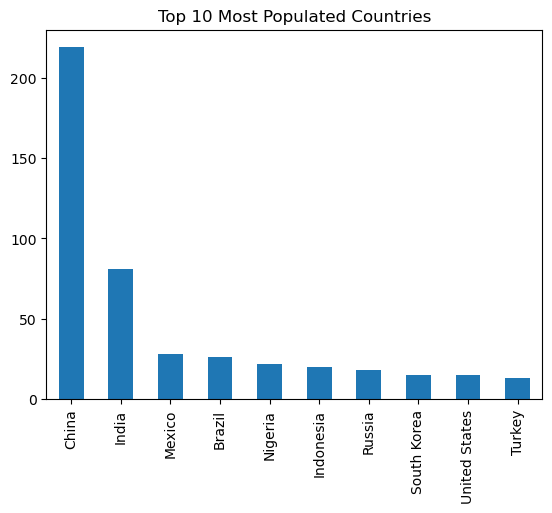

In [28]:
countries = df['Country'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Populated Countries')

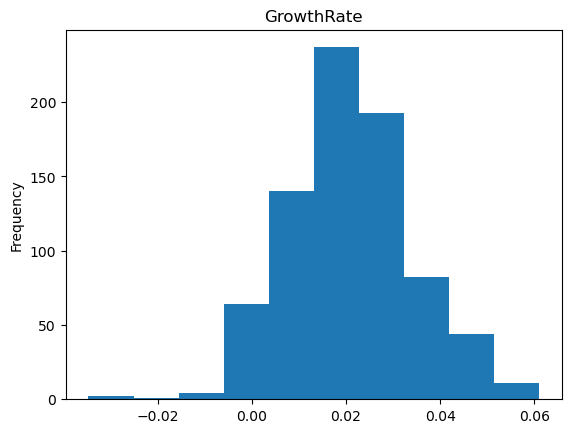

In [29]:
df['growthRate'].plot(kind='hist', title='GrowthRate')
plt.show()

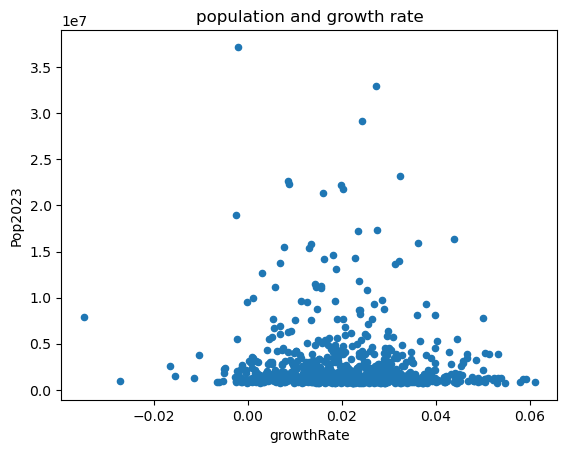

In [30]:
df.plot(kind='scatter', x= 'growthRate', y= 'Pop2023', title='population and growth rate')
plt.show()

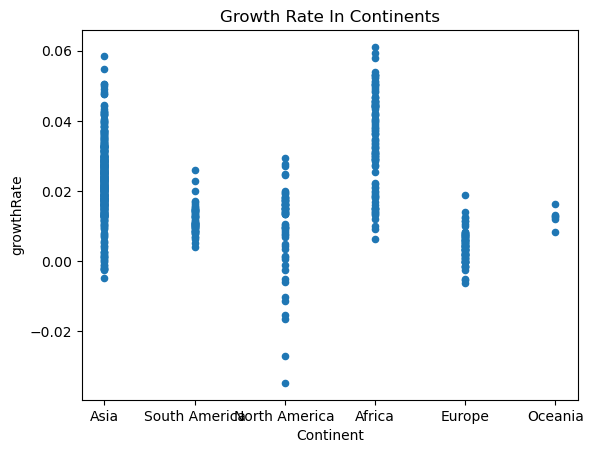

In [31]:
df.plot(kind='scatter', x= 'Continent', y= 'growthRate', title='Growth Rate In Continents')
plt.show()

In [32]:
df.columns

Index(['Pop2023', 'Pop2022', 'City', 'Country', 'Continent', 'growthRate',
       'rank'],
      dtype='object')

In [33]:
df1 = df.sort_values(by = 'Pop2023', ascending = False).reset_index().head(10)
fig = px.bar(df1,
             x = 'Country',
             y =  'Pop2023',
             color = 'Pop2023',
             color_continuous_scale = 'twilight',
             labels = {"2021_last_updated":"Population"}
            
            )

fig.update_layout(title = 'Top 20 countries with the most population in 2023',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'DarkSlateBlue'),
                  xaxis = dict(title = 'Country', tickangle = 45),
                  yaxis = dict(title = 'Population'))

fig.show()

In [34]:
df1 = df.sort_values(by = ['Pop2023'],ascending = False).reset_index().head(10)

fig = px.pie(values = df1['Pop2023'],
             names = df1['Continent'],
             color_discrete_sequence = px.colors.sequential.thermal)

fig.update_layout(title = 'The percentage of population in continents',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'DarkBlue')
                 
                 )
fig.show()